In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
data = pd.read_csv('housing.csv')

## 데이터 구조 살펴보기

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


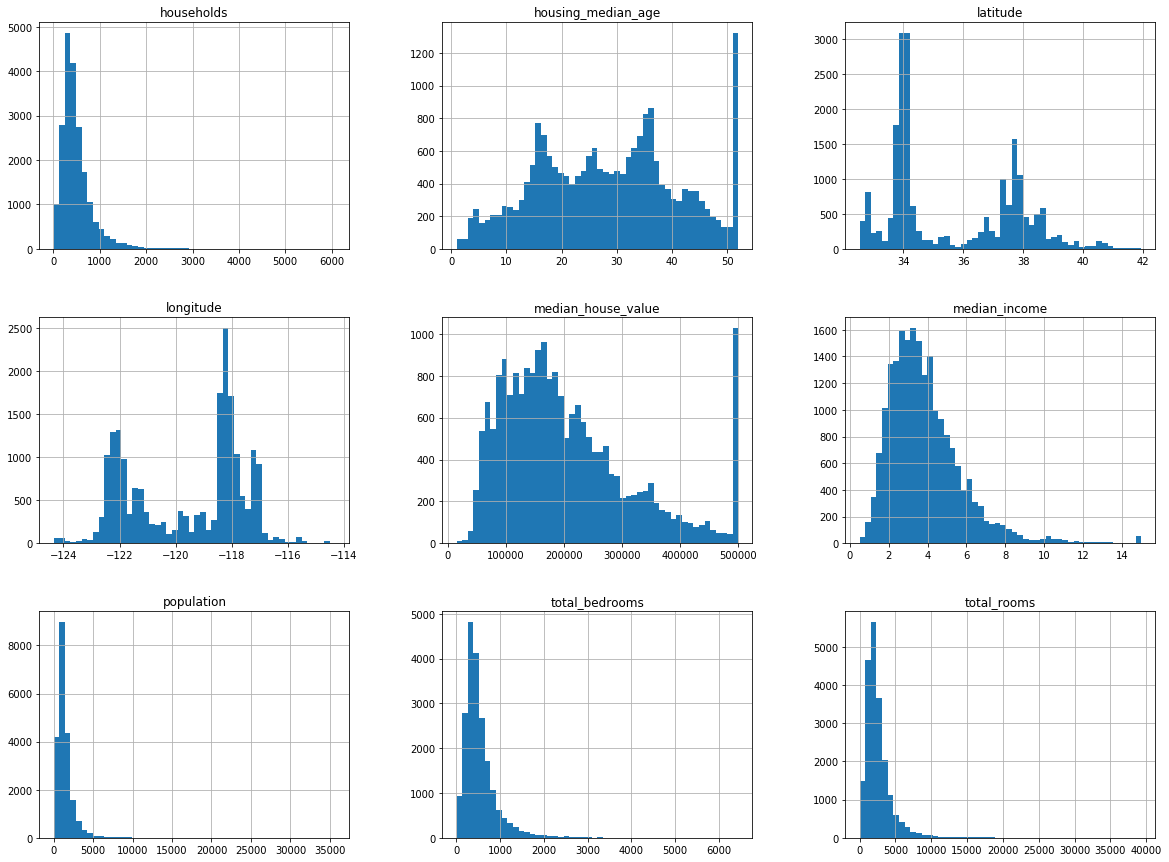

In [7]:
data.hist(bins=50,figsize=(20,15))
plt.show()

### 테스트셋 만들기

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data,test_size=.2,random_state=42)

## 계층 샘플링

In [9]:
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5,5.0,inplace=True)

In [10]:
data[['income_cat','median_income']]

,income_cat,median_income
0,5.0,8.3252
1,5.0,8.3014
2,5.0,7.2574
3,4.0,5.6431
4,3.0,3.8462
...,...,...
20635,2.0,1.5603
20636,2.0,2.5568
20637,2.0,1.7000
20638,2.0,1.8672


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)

In [12]:
for train_idx,test_idx in split.split(data,data['income_cat']):
    start_train_set = data.loc[train_idx]
    start_test_set = data.loc[test_idx]

In [13]:
data['income_cat'].value_counts()/len(data) # 전체 비율

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
start_train_set['income_cat'].value_counts()/len(start_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [15]:
start_test_set['income_cat'].value_counts()/len(start_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

비율이 똑같다.  -> 한 변수를 기준으로 비율이 똑같게 나눠주는 것

In [16]:
## 데이터 복구
for set_ in (start_train_set,start_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [17]:
## train set으로만 EDA
housing = start_train_set.copy()

## Visualization

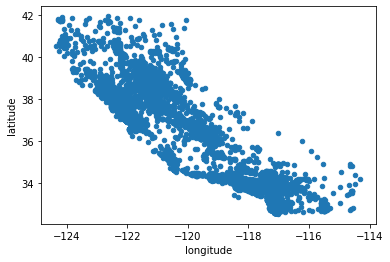

In [18]:
housing.plot(kind='scatter',x='longitude',y='latitude')
plt.show()

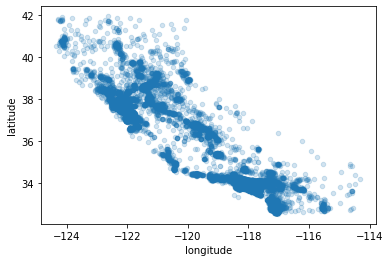

In [19]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=.2)
plt.show()

밀집된 지역 나타남

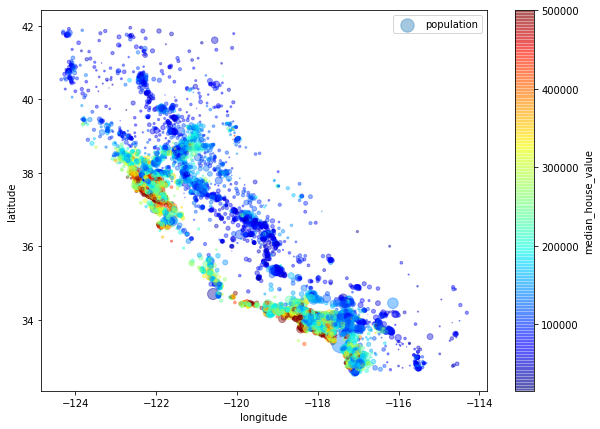

In [20]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=.4,
            s=housing['population']/100,label='population',figsize=(10,7),
            c='median_house_value',cmap = plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()

바다와 인접한 지역이 인구가 많다.

## 상관계수

In [21]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299FBC16C50>,
      dtype=object)

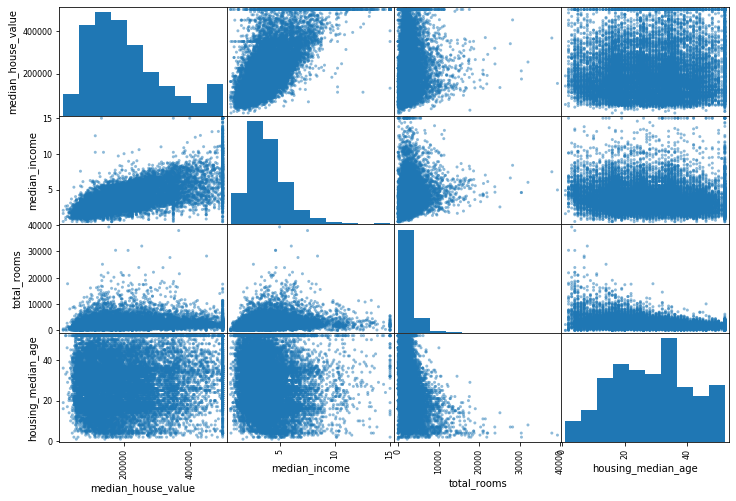

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

median income,median_house_value 양의 상관관계

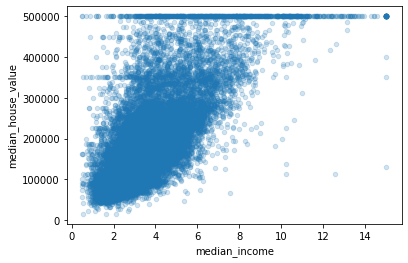

In [23]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=.2)
plt.show()

이상치 보임 500000, 제거 필요

## 특성 조합으로 실험

In [24]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [25]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 모델링을 위한 데이터 준비

In [26]:
housing = start_train_set.drop('median_house_value',axis=1)
housing_labels = start_train_set['median_house_value'].copy()

In [27]:
housing.dropna(subset=['total_bedrooms'])
housing.drop('total_bedrooms',axis=1)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True) # 어찌됐든 다 삭제

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [29]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [30]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_ # 각 특성의 중간값을 계산해서 statistics_ 속성에 저장

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [50]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [52]:
X = imputer.transform(housing_num)

In [53]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=list(housing.index.values))

In [55]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


## 텍스트와 범주형 특성 전처리

In [57]:
housing_cat = housing['ocean_proximity']
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [58]:
housing_cat_encoded,housing_categories = housing_cat.factorize()

In [59]:
housing_cat_encoded

array([0, 0, 1, ..., 2, 0, 3], dtype=int64)

In [60]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [63]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [64]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
# category는 비슷 onehot이랑

## 나만의 변환기

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler # 0~1 사이
from sklearn.preprocessing import StandardScaler # 표준화

## 변환 파이프라인

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer(np.nan,strategy='median')),
                        ('attribs_adder',CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [71]:
from sklearn.base import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [72]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(np.nan,strategy='median')),
    ('std_scaler',StandardScaler())
])

In [78]:
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('cat_encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [79]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

In [80]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16512x13 sparse matrix of type '<class 'numpy.float64'>'
	with 148608 stored elements in Compressed Sparse Row format>

In [76]:
housing_prepared.shape

(16512, 13)

In [84]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [85]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [87]:
lin_reg.predict(some_data_prepared)

array([211574.39524336, 321345.10514334, 210947.51983552,  61921.01197602,
       192362.32961567])

In [88]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.98178244587

In [90]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [91]:
housing_predictions = dt.predict(housing_prepared)
dt_mse = mean_squared_error(housing_labels,housing_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_mse

0.0

overfitting

In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_mse_scores = np.sqrt(-scores)

In [94]:
tree_mse_scores.mean()

69570.62104449584

In [96]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse = np.sqrt(-lin_scores)
rmse.mean()

69223.1859414427

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [99]:
pred = rf.predict(housing_prepared)
rf_score = cross_val_score(rf,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
rf_rmse = np.sqrt(-rf_score)
rf_rmse.mean()

49536.20528241699

## Model Tunning

- Grid Search

In [100]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8],'bootstrap':[False]}]
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [103]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}

In [109]:
cvres = grid_search.cv_results_
for mean_scores,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_scores),params)

62870.6111296466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54038.99580762019 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
51927.629173833455 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
59273.17388845567 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51837.50943337966 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
50061.269670345035 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
58582.394661914965 {'bootstrap': False, 'max_features': 6, 'n_estimators': 3}
51595.289570749395 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
50355.92487424536 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
57624.96130644364 {'bootstrap': False, 'max_features': 8, 'n_estimators': 3}
52723.07427524798 {'bootstrap': False, 'max_features': 8, 'n_estimators': 10}
50351.220947864145 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}


## 최상의 모델과 오차 분석

In [110]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.27062437e-01, 1.13182708e-01, 4.74119707e-02, 4.28282484e-02,
       3.25232942e-02, 4.98281984e-02, 3.24728285e-02, 3.78334802e-01,
       2.09341025e-02, 1.37205204e-01, 6.35052910e-05, 7.34152679e-03,
       1.08111744e-02])

In [116]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder = cat_pipeline.named_steps["cat_encoder"]
attributes = num_attribs + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3783348020443614, 'median_income'),
 (0.13720520382456597, 'pop_per_hhold'),
 (0.12706243723531702, 'longitude'),
 (0.11318270774168193, 'latitude'),
 (0.04982819839008343, 'population'),
 (0.047411970746068274, 'housing_median_age'),
 (0.042828248431746305, 'total_rooms'),
 (0.03252329415357459, 'total_bedrooms'),
 (0.03247282846400168, 'households'),
 (0.020934102494924684, 'rooms_per_hhold'),
 (6.350529099763644e-05, 'bedrooms_per_room')]

In [118]:

final_model = grid_search.best_estimator_

X_test = start_test_set.drop("median_house_value", axis=1)
y_test = start_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [119]:
final_rmse

47834.546604105315